# IPL Clustering

In this project I try to cluster players in the IPL 2023 on there performace with bat and ball. The data used to cluster the players is from kaggle and provides a number of statistics from each match.

In [1]:
#Importing the main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#The batting data set
df_bat = pd.read_csv('archive/IPL2023_Batsman.csv',encoding='ISO-8859-1')

First I want to clean the batting dataset and remove columns which I don't need (not relevant).

In [3]:
#Head of the batting data set
df_bat.head()

,match_no,Batsman,team,Run,Ball,4s,6s,out_by
0,1,Devon Conway,Chennai Super Kings,1,6,0,0,Mohammed Shami
1,1,Ruturaj Gaikwad,Chennai Super Kings,92,50,4,9,Alzarri Joseph
2,1,Moeen Ali,Chennai Super Kings,23,17,4,1,Rashid Khan
3,1,Ben Stokes,Chennai Super Kings,7,6,1,0,Rashid Khan
4,1,Ambati Rayudu,Chennai Super Kings,12,12,0,1,Joshua Little


In [4]:
#Some info of the dataset
df_bat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1114 entries, 0 to 1113
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   match_no  1114 non-null   int64 
 1   Batsman   1114 non-null   object
 2   team      1114 non-null   object
 3   Run       1114 non-null   int64 
 4   Ball      1114 non-null   int64 
 5   4s        1114 non-null   int64 
 6   6s        1114 non-null   int64 
 7   out_by    1114 non-null   object
dtypes: int64(5), object(3)
memory usage: 69.8+ KB


In [5]:
#Some statistics from the data set
df_bat.describe()

,match_no,Run,Ball,4s,6s
count,1114.000000,1114.000000,1114.000000,1114.000000,1114.000000
mean,34.609515,20.733393,14.648115,1.847397,0.951526
std,20.049515,22.933746,13.582402,2.496009,1.574557
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17.250000,3.000000,4.000000,0.000000,0.000000
50%,34.000000,12.000000,10.000000,1.000000,0.000000
75%,52.000000,30.000000,21.000000,3.000000,1.000000
max,70.000000,124.000000,66.000000,16.000000,10.000000


Note here there are no missing values to think about.

In [6]:
#Dropping the out_by, match_no and team columns
df_bat.drop(['out_by','match_no','team'],axis=1,inplace=True)
#Renaming the Run and Ball columns to Runs and Balls Faced
df_bat.rename(columns = {'Run':'Runs','Ball':'Balls Faced'}, inplace = True)

In [7]:
#Resulting data frame
df_bat.head()

,Batsman,Runs,Balls Faced,4s,6s
0,Devon Conway,1,6,0,0
1,Ruturaj Gaikwad,92,50,4,9
2,Moeen Ali,23,17,4,1
3,Ben Stokes,7,6,1,0
4,Ambati Rayudu,12,12,0,1


Now we groupby the batsman and take the sum to see there combine stats over all games.

In [8]:
#Making a data frame which groups by the batsman and adds the rows together
df_bat_gbb = df_bat.groupby(by='Batsman').sum()

In [9]:
#Head of the new data frame
df_bat_gbb.head()

,Runs,Balls Faced,4s,6s
Batsman,,,,
Abdul Basith,1,1,0,0
Abdul Samad,169,128,10,11
Abhinav Manohar,114,83,6,7
Abhishek Sharma,225,157,28,6
Abishek Porel,33,31,1,0


Next I look at the bowling dataset and clean that dataset.

In [10]:
#The bowling data set 
df_bow = pd.read_csv('archive/IPL2023_Bowler.csv',encoding='ISO-8859-1')

In [11]:
#Head of the bowling data set 
df_bow.head()

,match_no,Bowler,team,over,run,wicket,No_ball,ECO
0,1,Mohammed Shami,Gujarat Titans,4.0,29,2,1,7.3
1,1,Hardik Pandya,Gujarat Titans,3.0,28,0,0,9.3
2,1,Joshua Little,Gujarat Titans,4.0,41,1,0,10.3
3,1,Rashid Khan,Gujarat Titans,4.0,26,2,0,6.5
4,1,Alzarri Joseph,Gujarat Titans,4.0,33,2,0,8.3


In [12]:
#Droping the ECO, No_ball, match_no and team columns
df_bow.drop(['ECO','No_ball','match_no','team'],axis=1,inplace=True)

In [13]:
#Head of the bowling data set
df_bow.head()

,Bowler,over,run,wicket
0,Mohammed Shami,4.0,29,2
1,Hardik Pandya,3.0,28,0
2,Joshua Little,4.0,41,1
3,Rashid Khan,4.0,26,2
4,Alzarri Joseph,4.0,33,2


Now python might get slightly confused when summing the over column as it should only end in .0,.1,.2,.3,.4 or .5. So instead I will write a function to count the number of ball bowled instead. Then I will use this to make a new column balls bowled.

In [14]:
#A function to take overs to balls bowled
def balls_bowled(overs):
    balls = 0
    while overs >= 1:
        balls += 6
        overs -= 1
        if overs < 1:
            break
    balls += 10*overs
    return int(balls) 

In [15]:
#Making a new column for balls bowled
df_bow['Balls Bowled'] = df_bow['over'].apply(lambda x: balls_bowled(x))

In [16]:
#Drop the over column
df_bow.drop('over',axis=1,inplace=True)
#Rename the run and wicket columns to Runs Conceded and Wickets
df_bow.rename(columns={'run':'Runs Conceded','wicket':'Wickets'},inplace=True)

In [17]:
#Head of the new bowler data frame
df_bow.head()

,Bowler,Runs Conceded,Wickets,Balls Bowled
0,Mohammed Shami,29,2,24
1,Hardik Pandya,28,0,18
2,Joshua Little,41,1,24
3,Rashid Khan,26,2,24
4,Alzarri Joseph,33,2,24


Now we groupby the bowler and take the sum to see there combine stats over all games.

In [18]:
#Grouping by bowler 
df_bow_gbb = df_bow.groupby(by='Bowler').sum()

In [19]:
#Head of the bowler groupby dataframe
df_bow_gbb.head()

,Runs Conceded,Wickets,Balls Bowled
Bowler,,,
Abhishek Sharma,124,2,72
Adam Zampa,188,8,132
Adil Rashid,56,2,42
Aiden Markram,70,1,49
Akash Deep,59,1,30


## Inner join datasets

First I start with an inner join on the datasets and make a new dataset from this inner join. This will allow me to look at only those players who have bowled and batted in the tournament. Some of which will be alrounders, therefore, I'll call the data frame df_allrounder.

In [20]:
#Inner join of the two groupby data frames
df_allrounder = pd.concat([df_bat_gbb,df_bow_gbb],axis=1,join='inner')
#Reseting the index
df_allrounder.reset_index(inplace=True)

In [21]:
#Change the index column to a Player column
df_allrounder.rename(columns = {'index':'Player'}, inplace = True)

In [22]:
#Head of the allrounder dataframe
df_allrounder.head()

,Player,Runs,Balls Faced,4s,6s,Runs Conceded,Wickets,Balls Bowled
0,Abhishek Sharma,225,157,28,6,124,2,72
1,Adam Zampa,10,16,0,0,188,8,132
2,Adil Rashid,22,16,2,1,56,2,42
3,Aiden Markram,248,197,18,8,70,1,49
4,Akash Deep,17,8,2,1,59,1,30


Here I just explore some of the interesting data.

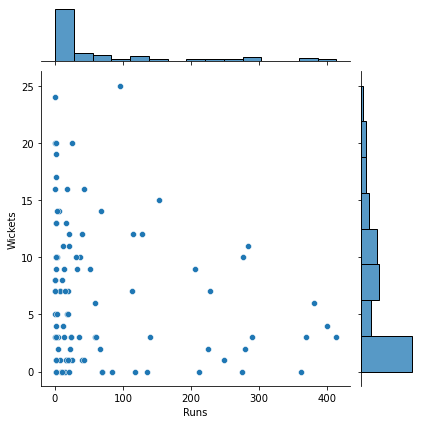

In [23]:
#Jointplot of Runs and Wickets
sns.jointplot(x='Runs',y='Wickets',data=df_allrounder)

In [24]:
#Players with more than 400 runs in the allrounder data frame 
df_allrounder[df_allrounder['Runs'] > 400]

,Player,Runs,Balls Faced,4s,6s,Runs Conceded,Wickets,Balls Bowled
67,Nitish Rana,413,293,39,20,75,3,53


In [25]:
#Players with more than 20 wickets in the allrounder dataframe
df_allrounder[df_allrounder['Wickets'] >= 20]

,Player,Runs,Balls Faced,4s,6s,Runs Conceded,Wickets,Balls Bowled
59,Mohammed Shami,0,1,0,0,433,24,330
69,Piyush Chawla,25,20,1,1,422,20,324
73,Rashid Khan,95,40,4,11,430,25,336
90,Tushar Deshpande,0,1,0,0,465,20,293
94,Varun Chakaravarthy,1,9,0,0,429,20,316


In [26]:
#Players with more than 200 runs or more than 10 wickets in the allrounder dataframe
df_allrounder[(df_allrounder['Runs'] > 200) | (df_allrounder['Wickets'] > 10)].head()

,Player,Runs,Balls Faced,4s,6s,Runs Conceded,Wickets,Balls Bowled
0,Abhishek Sharma,225,157,28,6,124,2,72
3,Aiden Markram,248,197,18,8,70,1,49
8,Andre Russell,227,156,13,18,172,7,91
13,Arshdeep Singh,2,2,0,0,493,17,305
15,Axar Patel,283,203,21,12,338,11,282


In [27]:
#Number of players in the allrounder dataframe with more than 50 runs or more than 3 wickets 
len(df_allrounder[(df_allrounder['Runs'] > 50) | (df_allrounder['Wickets'] > 3)])

74

In [28]:
#Number of players in the allrounder dataframe with more than 50 runs and more than 3 wickets 
len(df_allrounder[(df_allrounder['Runs'] > 50) & (df_allrounder['Wickets'] > 3)])

14

Now we try to cluster the players in this dataset into 2 clusters. For this I use sklearn's KMeans clustering algorithm.

In [29]:
from sklearn.cluster import KMeans

In [30]:
kmeans = KMeans(n_clusters=2)

At the moment I'm only interested in wickets and runs. Here I try the clustering algorithm without any scaling of the variables.

In [31]:
#Fitting the model and dropping all the columns which are not Wickets or Runs 
kmeans.fit(df_allrounder.drop(['Player','4s','6s','Balls Faced','Balls Bowled','Runs Conceded'],axis=1))

KMeans(n_clusters=2)

In [32]:
#The centre of the clusters
kmeans.cluster_centers_

array([[ 28.        ,   7.11627907],
       [296.06666667,   4.06666667]])

In [33]:
#The labels for each group
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [34]:
#Data frame of the above
df_cluster = pd.DataFrame(kmeans.labels_)

In [35]:
#Combining the labels with inner joined data frame above
df = pd.concat([df_allrounder,df_cluster],axis=1)

In [36]:
#Head of the dataframe 
df.head()

,Player,Runs,Balls Faced,4s,6s,Runs Conceded,Wickets,Balls Bowled,0
0,Abhishek Sharma,225,157,28,6,124,2,72,1
1,Adam Zampa,10,16,0,0,188,8,132,0
2,Adil Rashid,22,16,2,1,56,2,42,0
3,Aiden Markram,248,197,18,8,70,1,49,1
4,Akash Deep,17,8,2,1,59,1,30,0


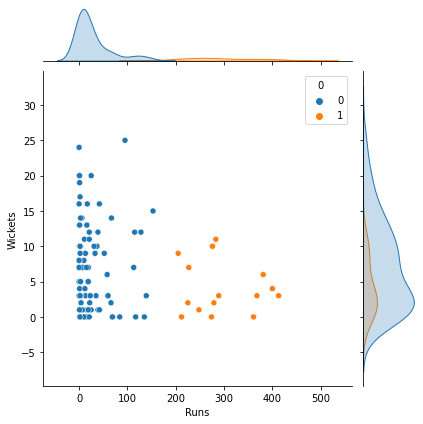

In [37]:
#Here is how the clustering algorithm did 
sns.jointplot(x='Runs',y='Wickets',data=df,hue=0)

Using the k means clustering algorithm with k = 2 seems to split the players into those who scored more than 200 runs and those who scored less than 200 runs. To try to split the players into batting and bowling alrounders let us look at k means clustering with k = 3. 

In [38]:
#KMeas with k = 3
kmeans = KMeans(n_clusters=3)

In [39]:
#Fitting
kmeans.fit(df_allrounder.drop(['Player','4s','6s','Balls Faced','Balls Bowled','Runs Conceded'],axis=1))

KMeans(n_clusters=3)

In [40]:
#Cluster centers
kmeans.cluster_centers_

array([[ 12.58571429,   7.28571429],
       [296.06666667,   4.06666667],
       [ 95.4375    ,   6.375     ]])

In [41]:
#The labels of the clustering
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 2, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       1, 0, 1, 2, 1, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0], dtype=int32)

In [42]:
#Data frame of the labels
df_cluster = pd.DataFrame(kmeans.labels_)

In [43]:
#Combining this with the original inner join data frame
df = pd.concat([df_allrounder,df_cluster],axis=1)

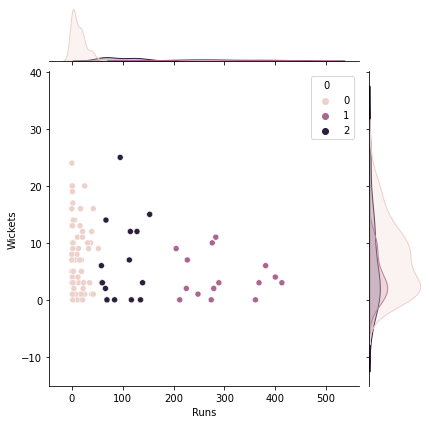

In [44]:
#Clustering visualization 
sns.jointplot(x='Runs',y='Wickets',data=df,hue=0)

This time it seems to cluster the players in to three groups again according to runs scored. With 0-100 being one group, 100-200 another and 200+ the other group. To try to fix this problem this time we will scale the data using a MinMaxScalar.

In [45]:
#Importing the MinMaxScalar
from sklearn.preprocessing import MinMaxScaler

In [46]:
#Instance of the scaler
scaler = MinMaxScaler()

In [47]:
#Just making a df with runs and wickets only from the inner joined data frame
df_runs_wickets = df_allrounder.drop(['Player','4s','6s','Balls Faced','Balls Bowled','Runs Conceded'],axis=1)

In [48]:
#Scaling that very data frame
df_runs_wickets = scaler.fit_transform(df_runs_wickets)

In [49]:
#KMeans with k = 3 again
kmeans = KMeans(n_clusters=3)

In [50]:
#Fitting
kmeans.fit(df_runs_wickets)

KMeans(n_clusters=3)

In [51]:
#Cluster centres
kmeans.cluster_centers_

array([[0.06706565, 0.11849057],
       [0.71686844, 0.16266667],
       [0.06897058, 0.55151515]])

In [52]:
#Labels from the clustering
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1, 1, 0, 2, 1, 0, 0,
       0, 2, 0, 0, 1, 0, 1, 2, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 2, 1, 0, 1, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 0, 0, 2,
       0, 1, 2, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 2, 0, 1,
       2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0], dtype=int32)

In [53]:
#Making a data frame of the labels
df_cluster = pd.DataFrame(kmeans.labels_)

In [54]:
#Concatinating the inner joined data frame with the labels
df = pd.concat([df_allrounder,df_cluster],axis=1)

In [55]:
#Head of the data frame
df.head()

,Player,Runs,Balls Faced,4s,6s,Runs Conceded,Wickets,Balls Bowled,0
0,Abhishek Sharma,225,157,28,6,124,2,72,1
1,Adam Zampa,10,16,0,0,188,8,132,0
2,Adil Rashid,22,16,2,1,56,2,42,0
3,Aiden Markram,248,197,18,8,70,1,49,1
4,Akash Deep,17,8,2,1,59,1,30,0


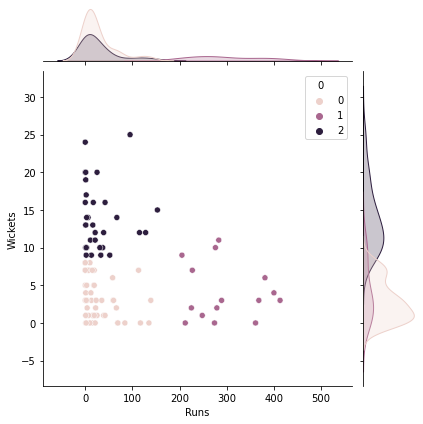

In [56]:
#The results of the clustering
sns.jointplot(x='Runs',y='Wickets',data=df,hue=0)

This time the clustering seems to now split the group more according to wickets and runs and not just runs.  Roughly one group seems to be for more than 200 runs, a second group is for more than 8 wickets and another group is for those with 8 wickets for less and less than 200 runs. From here we can workout which players did well with the bat and which players did well with the ball in particular. 

## Outer Join datasets

Now I look at an outer join on the datasets and make a new data frame from this outer join. Note when doing an outer join here I have to fill the null values with a 0.

In [57]:
#Outer joined dataframe
df = pd.concat([df_bat_gbb,df_bow_gbb],axis=1,join='outer')

In [58]:
#Filling the null values with 0
df.fillna(0,inplace=True)
#Reset the index
df.reset_index(inplace=True)
#Naming the index column Player
df.rename(columns={'index':'Player'},inplace=True)
#Head of the data frame
df.head()

,Player,Runs,Balls Faced,4s,6s,Runs Conceded,Wickets,Balls Bowled
0,Abdul Basith,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Abdul Samad,169.0,128.0,10.0,11.0,0.0,0.0,0.0
2,Abhinav Manohar,114.0,83.0,6.0,7.0,0.0,0.0,0.0
3,Abhishek Sharma,225.0,157.0,28.0,6.0,124.0,2.0,72.0
4,Abishek Porel,33.0,31.0,1.0,0.0,0.0,0.0,0.0


Here I again explore some of the interesting data in this dataset.

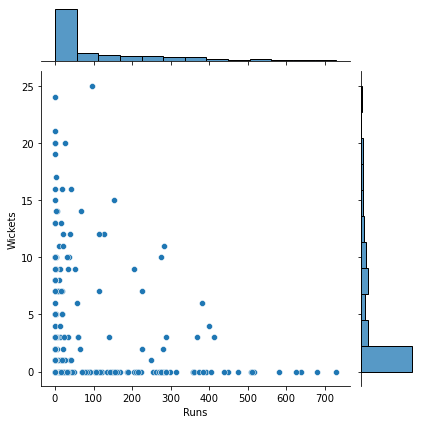

In [59]:
sns.jointplot(x='Runs',y='Wickets',data=df)

Now I do the same as before, I will scale the data and using the k means clustering algorithm to cluster the players into different catagories.

In [60]:
#Scaler 
scaler = MinMaxScaler()

In [61]:
#The data frame with only Runs and Wickets
df_runs_wickets = df.drop(['Player','4s','6s','Balls Faced','Balls Bowled','Runs Conceded'],axis=1)

In [62]:
#Fitting using the sclaer
df_runs_wickets = scaler.fit_transform(df_runs_wickets)

Now I perform the k means clustering algorithm on this dataset with 3 different clusters.

In [63]:
#Instance of the model
kmeans = KMeans(n_clusters=3)

In [64]:
#Fitting the model on Wickets and Runs
kmeans.fit(df_runs_wickets)

KMeans(n_clusters=3)

In [65]:
#Centre of the clusters
kmeans.cluster_centers_

array([[0.05119552, 0.04581818],
       [0.04756469, 0.48074074],
       [0.48832763, 0.02583333]])

In [66]:
#The labels 
kmeans.labels_

array([0, 0, 0, 2, 0, 1, 0, 2, 2, 0, 0, 1, 0, 0, 1, 2, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 2, 0, 0, 1, 2, 0, 0, 2, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2,
       0, 2, 0, 2, 1, 0, 0, 0, 1, 0, 2, 0, 2, 1, 1, 0, 2, 0, 2, 0, 0, 0,
       2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 2,
       1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 2, 2, 1, 2,
       1, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 1, 1, 1, 1, 2, 1, 2, 0, 0, 0,
       2, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 2, 0, 0,
       2, 2, 1, 0, 1, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 1, 2, 0, 2, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int32)

In [67]:
#Makeing the labels into a data frame
df_cluster2 = pd.DataFrame(kmeans.labels_)

In [68]:
#The outer data frame combined with the labels
df_con = pd.concat([df,df_cluster2],axis=1)
df_con.head()

,Player,Runs,Balls Faced,4s,6s,Runs Conceded,Wickets,Balls Bowled,0
0,Abdul Basith,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0
1,Abdul Samad,169.0,128.0,10.0,11.0,0.0,0.0,0.0,0
2,Abhinav Manohar,114.0,83.0,6.0,7.0,0.0,0.0,0.0,0
3,Abhishek Sharma,225.0,157.0,28.0,6.0,124.0,2.0,72.0,2
4,Abishek Porel,33.0,31.0,1.0,0.0,0.0,0.0,0.0,0


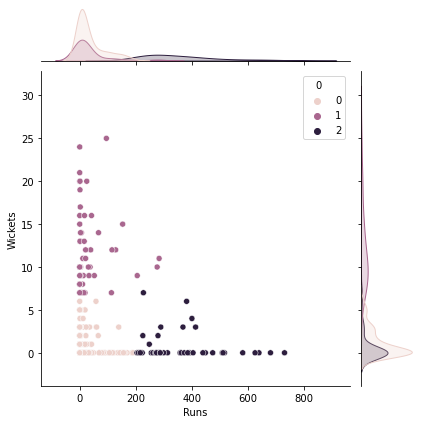

In [69]:
#A visual representation of the 3 clusters
sns.jointplot(x='Runs',y='Wickets',data=df_con,hue=0)

This again gives a clustering of the players according to Runs and Wickets which could be useful to help understand who had a good game with the bat or with the ball.